In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.time_series import stationarity_tester
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('df_InterP_mode_zscore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6308 non-null   int64  
 1   date         6308 non-null   object 
 2   Tn           6308 non-null   float64
 3   Tx           6308 non-null   float64
 4   Tavg         6308 non-null   float64
 5   RH_avg       6308 non-null   float64
 6   ss           6308 non-null   float64
 7   ff_x         6308 non-null   float64
 8   ddd_x        6308 non-null   float64
 9   ff_avg       6308 non-null   float64
 10  RR           6308 non-null   float64
 11  ddd_car      6308 non-null   object 
 12  region_name  6308 non-null   object 
 13  flood        6308 non-null   int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 690.1+ KB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# df['date'] = pd.to_datetime(df['date'])
df_copy = df.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.set_index('date', inplace=True)

In [6]:
stasiun_1 = df_copy[(df_copy.index>='2016-1-1')&(df_copy.index<='2020-12-30') & (df_copy['region_name']=='Jakarta Selatan')]
stasiun_2 = df_copy[(df_copy.index>='2016-1-1')&(df_copy.index<='2020-12-30') & (df_copy['region_name']=='Jakarta Utara')]
stasiun_3 = df_copy[(df_copy.index>='2016-1-1')&(df_copy.index<='2020-12-30') & (df_copy['region_name']=='Jakarta Timur')]
stasiun_4 = df_copy[(df_copy.index>='2016-1-1')&(df_copy.index<='2020-12-30') & (df_copy['region_name']=='Jakarta Pusat')]

In [7]:
print(stasiun_1.shape)
print(stasiun_2.shape)
print(stasiun_3.shape)
print(stasiun_4.shape)

(1657, 12)
(1778, 12)
(1057, 12)
(1813, 12)


In [8]:
# membuat index baru untuk dilakukan interpolasi
new_index = pd.date_range(start=stasiun_1.index.min(), end=stasiun_1.index.max() + pd.DateOffset(days=1), freq='D')
new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=1827, freq='D')

In [9]:
stasiun_1_intrp = stasiun_1.reindex(new_index)
stasiun_2_intrp = stasiun_1.reindex(new_index)
stasiun_3_intrp = stasiun_1.reindex(new_index)
stasiun_4_intrp = stasiun_1.reindex(new_index)

In [10]:
num_cols = ['Tavg', 'RH_avg', 'RR', 'ss', 'ddd_x', 'ff_avg']

In [11]:
#interpolasi data pada tiap stasiun
stasiun_1_intrp = stasiun_1_intrp[num_cols].interpolate(method='linear')
stasiun_2_intrp = stasiun_2_intrp[num_cols].interpolate(method='linear')
stasiun_3_intrp = stasiun_3_intrp[num_cols].interpolate(method='linear')
stasiun_4_intrp = stasiun_4_intrp[num_cols].interpolate(method='linear')

In [12]:
#mengecek apakah index tiap stasiun sudah sama
print(stasiun_1_intrp.shape)
print(stasiun_2_intrp.shape)
print(stasiun_3_intrp.shape)
print(stasiun_4_intrp.shape)

(1827, 6)
(1827, 6)
(1827, 6)
(1827, 6)


In [13]:
stasiun_4_intrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2016-01-01 to 2020-12-31
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tavg    1827 non-null   float64
 1   RH_avg  1827 non-null   float64
 2   RR      1827 non-null   float64
 3   ss      1827 non-null   float64
 4   ddd_x   1827 non-null   float64
 5   ff_avg  1827 non-null   float64
dtypes: float64(6)
memory usage: 99.9 KB


In [14]:
stasiun_4_intrp

,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...
2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [15]:
stasiun_4_intrp[(stasiun_4_intrp.index >= '2016-03-01') & (stasiun_4_intrp.index <= '2016-12-31') & (stasiun_4_intrp['Tavg'].notnull())]

,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
2016-03-01,26.900000,88.000000,44.200000,2.500000,290.000000,3.000000
2016-03-02,26.941935,87.870968,42.780645,2.596774,289.032258,2.967742
2016-03-03,26.983871,87.741935,41.361290,2.693548,288.064516,2.935484
2016-03-04,27.025806,87.612903,39.941935,2.790323,287.096774,2.903226
2016-03-05,27.067742,87.483871,38.522581,2.887097,286.129032,2.870968
...,...,...,...,...,...,...
2016-12-27,27.300000,79.000000,0.700000,5.200000,270.000000,3.000000
2016-12-28,28.100000,77.000000,0.550000,2.500000,290.000000,7.000000
2016-12-29,27.600000,78.000000,0.400000,3.200000,260.000000,5.000000
2016-12-30,27.600000,79.000000,0.250000,3.600000,260.000000,4.000000


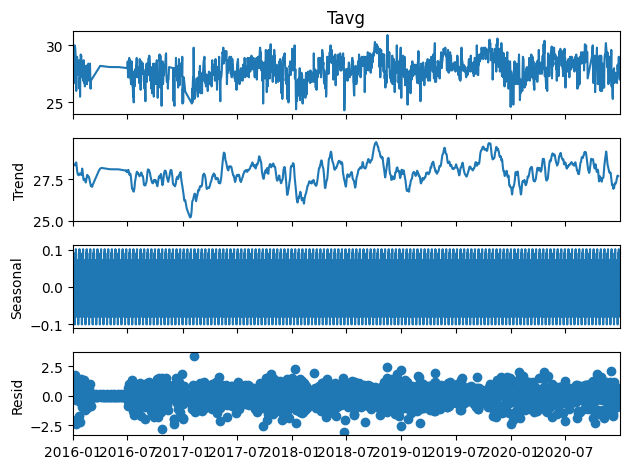

In [16]:
dec = sm.tsa.seasonal_decompose(stasiun_4_intrp['Tavg'] ,period = 12,model = 'additive').plot()
plt.show()

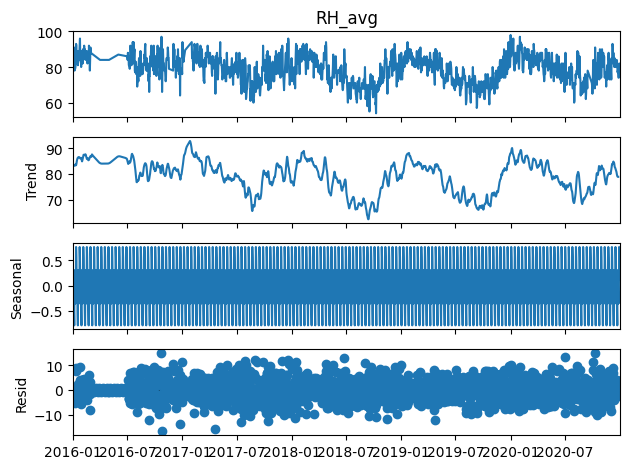

In [17]:
dec = sm.tsa.seasonal_decompose(stasiun_4_intrp['RH_avg'] ,period = 12,model = 'additive').plot()
plt.show()

In [18]:
stasiun_4_intrp.isna().sum()

Tavg      0
RH_avg    0
RR        0
ss        0
ddd_x     0
ff_avg    0
dtype: int64

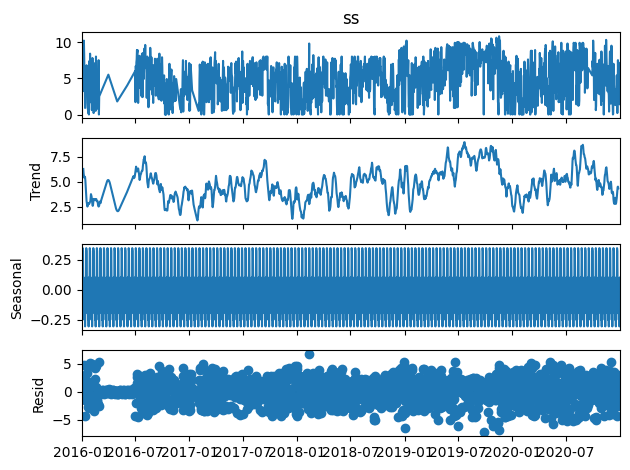

In [19]:
dec = sm.tsa.seasonal_decompose(stasiun_4_intrp['ss'] ,period = 12,model = 'additive').plot()
plt.show()

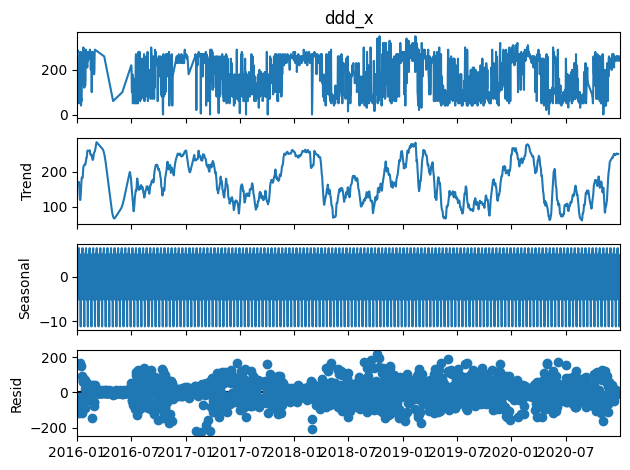

In [20]:
dec = sm.tsa.seasonal_decompose(stasiun_4_intrp['ddd_x'] ,period = 12,model = 'additive').plot()
plt.show()

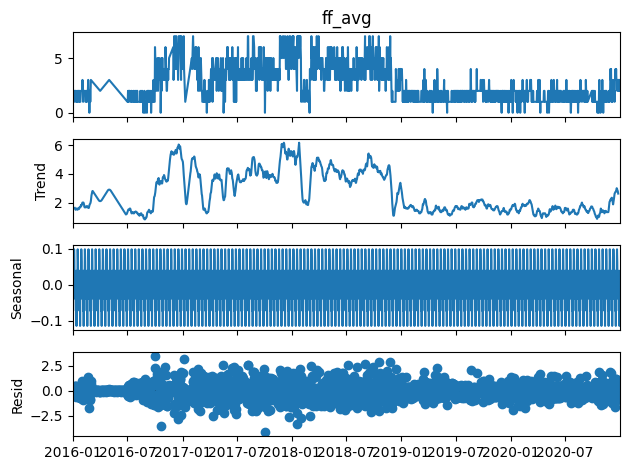

In [21]:
dec = sm.tsa.seasonal_decompose(stasiun_4_intrp['ff_avg'] ,period = 12,model = 'additive').plot()
plt.show()

In [23]:
stationarity_tester(stasiun_4_intrp['RH_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-3.214387,0.019167,-3.433976,-2.863142,-2.567623,True
KPSS,1.155546,0.01,0.739,0.463,0.347,True


In [24]:
stationarity_tester(stasiun_4_intrp['RR'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.511172,0.0,-3.43397,-2.863139,-2.567621,True
KPSS,1.417163,0.01,0.739,0.463,0.347,True


In [25]:
stationarity_tester(stasiun_4_intrp['ddd_x'])

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.035826,0.000019,-3.433958,-2.863134,-2.567618,True
KPSS,0.312818,0.1,0.739,0.463,0.347,False


In [26]:
stationarity_tester(stasiun_4_intrp['ff_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.1721,0.000734,-3.433954,-2.863132,-2.567618,True
KPSS,1.998164,0.01,0.739,0.463,0.347,True


In [27]:
stationarity_tester(stasiun_4_intrp['ss'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.006327,0.001378,-3.433982,-2.863144,-2.567624,True
KPSS,1.577026,0.01,0.739,0.463,0.347,True


In [39]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

Menerapkan orde differencing pada kolom Tavg untuk menghilangkan trend

In [29]:
diff_data_T = stasiun_4_intrp['Tavg'].diff()
diff_data_T.dropna(inplace=True)

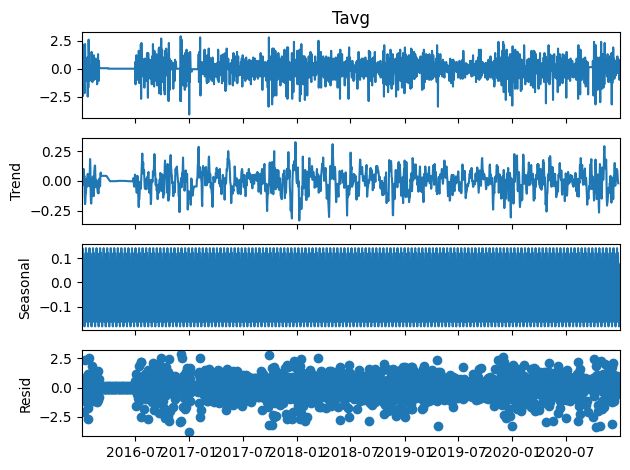

In [30]:
dec = sm.tsa.seasonal_decompose(diff_data_T ,period = 12,model = 'additive').plot()
plt.show()

In [32]:
stationarity_tester(diff_data_T)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.858039,0.0,-3.433978,-2.863143,-2.567623,True
KPSS,0.20271,0.1,0.739,0.463,0.347,False


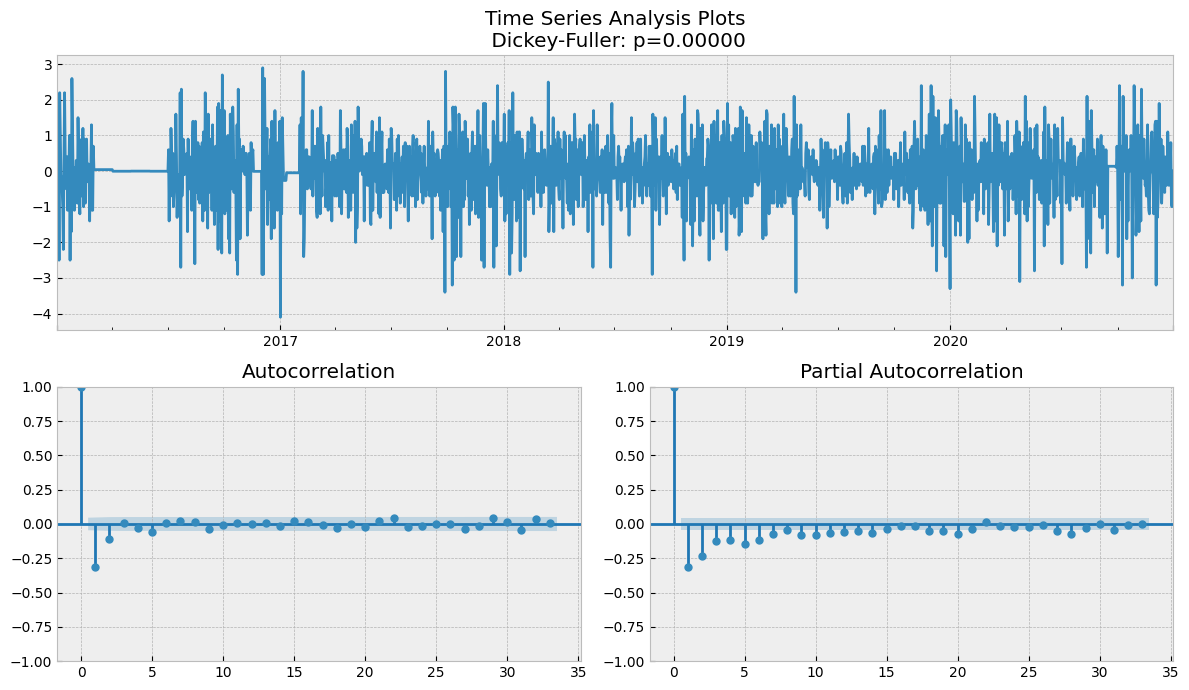

In [40]:
tsplot(diff_data_T)

parameter (p,d,q) Tavg = (1,1,1)

Menerapkan orde differencing pada kolom ss untuk menghilangkan trend

In [33]:
diff_data_ss = stasiun_4_intrp['ss'].diff()
diff_data_ss.dropna(inplace=True)

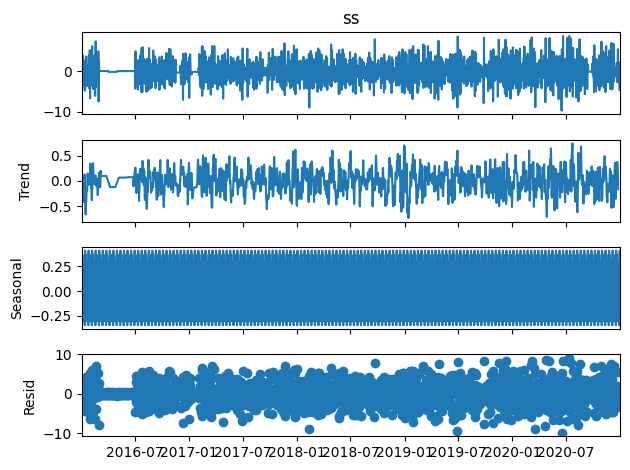

In [35]:
dec = sm.tsa.seasonal_decompose(diff_data_ss ,period = 12,model = 'additive').plot()
plt.show()

In [36]:
stationarity_tester(diff_data_ss)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.54721,0.0,-3.433988,-2.863147,-2.567626,True
KPSS,0.060964,0.1,0.739,0.463,0.347,False


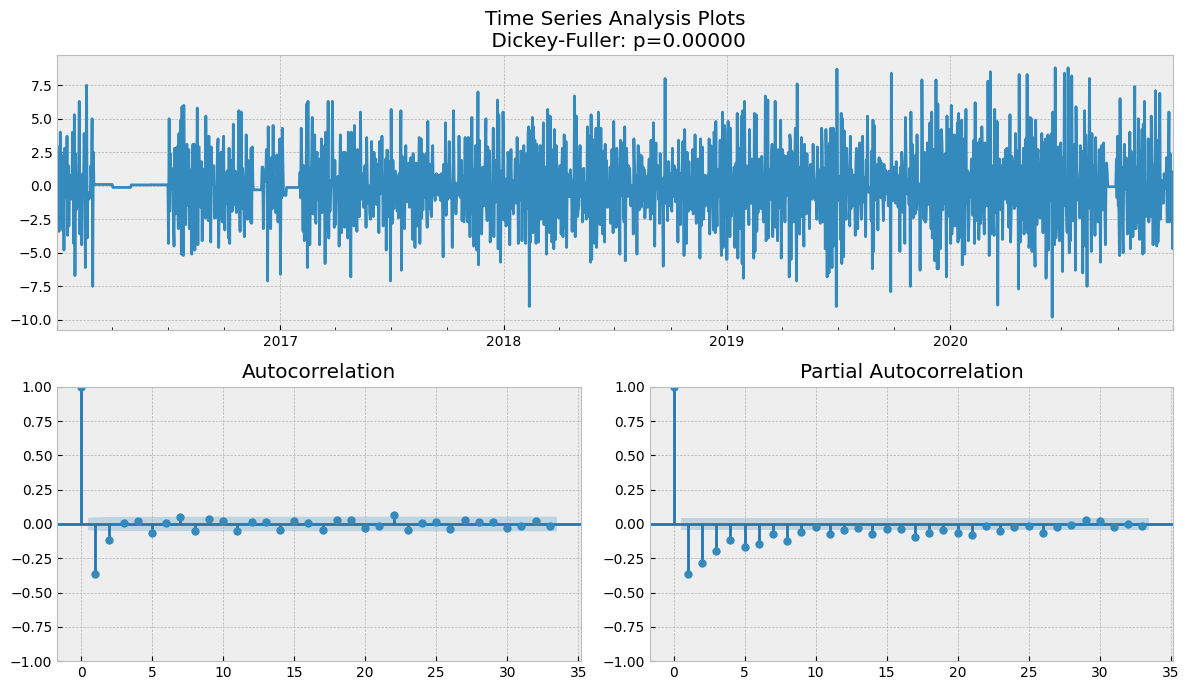

In [41]:
tsplot(diff_data_ss)

parameter (p,d,q) kolom ss = (2,1,1)

In [42]:
diff_data_rh = stasiun_4_intrp['RH_avg'].diff()
diff_data_rh.dropna(inplace=True)

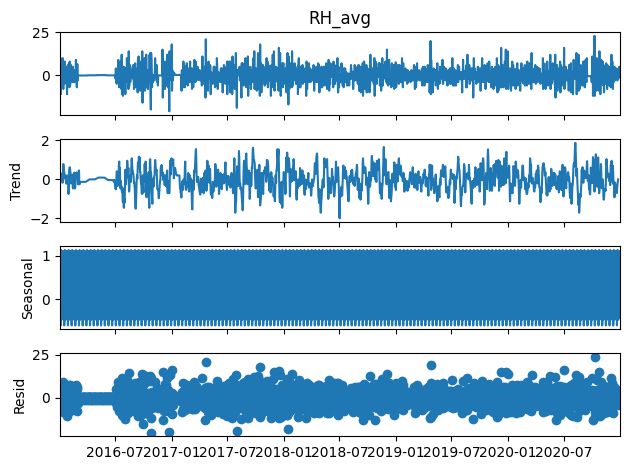

In [44]:
dec = sm.tsa.seasonal_decompose(diff_data_rh ,period = 12,model = 'additive').plot()
plt.show()

In [45]:
stationarity_tester(diff_data_rh)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-15.484604,0.0,-3.433976,-2.863142,-2.567623,True
KPSS,0.044261,0.1,0.739,0.463,0.347,False


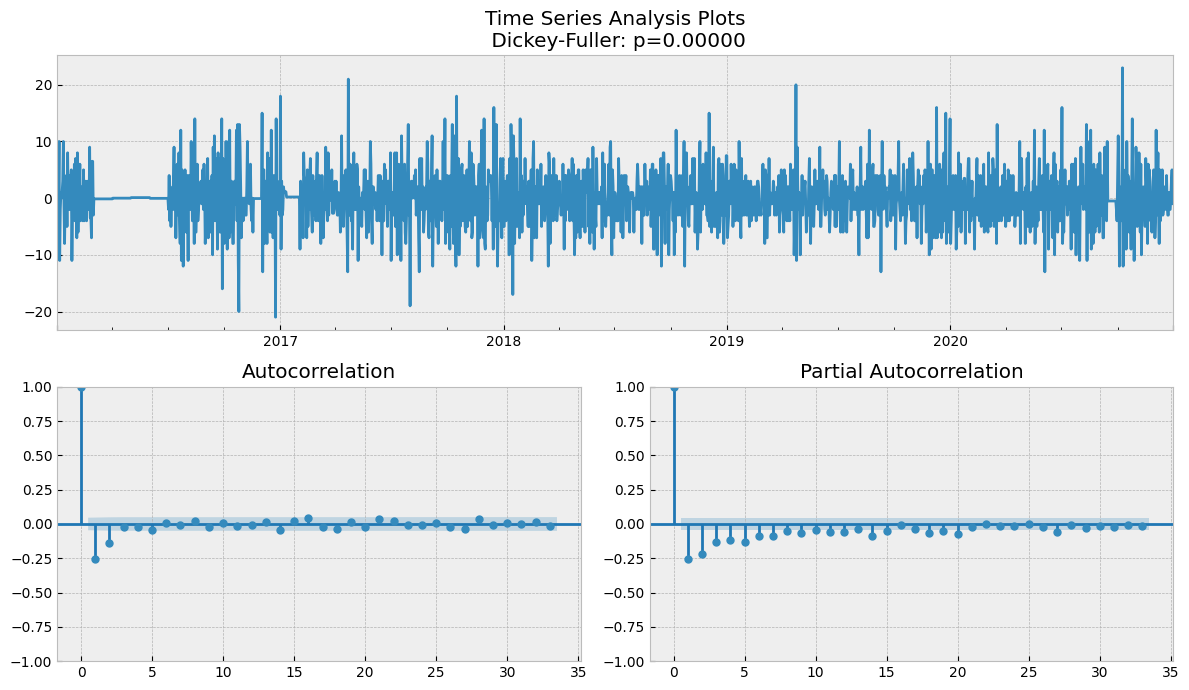

In [46]:
tsplot(diff_data_rh)

parameter (p,d,q) kolom rh = (1,1,1)

In [75]:
diff_data_rr = stasiun_4_intrp['RR'].diff(2)
diff_data_rr.dropna(inplace=True)

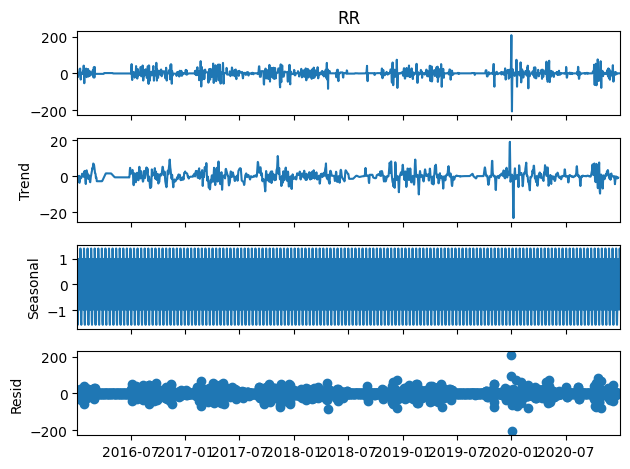

In [76]:
dec = sm.tsa.seasonal_decompose(diff_data_rr ,period = 12,model = 'additive').plot()
plt.show()

In [77]:
stationarity_tester(diff_data_rr)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-12.560453,0.0,-3.43399,-2.863148,-2.567626,True
KPSS,0.142614,0.1,0.739,0.463,0.347,False


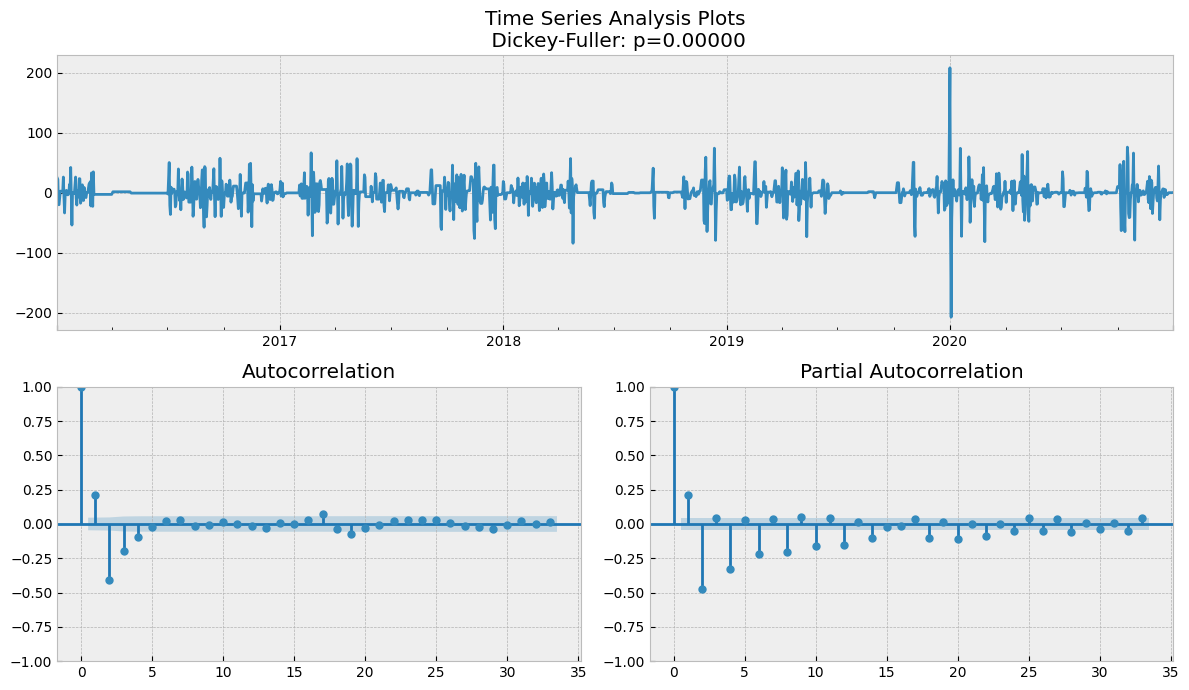

In [78]:
tsplot(diff_data_rr)

parameter (p,d,q) kolom RR = (2,2,1)

In [80]:
diff_data_ff = stasiun_4_intrp['ff_avg'].diff()
diff_data_ff.dropna(inplace=True)

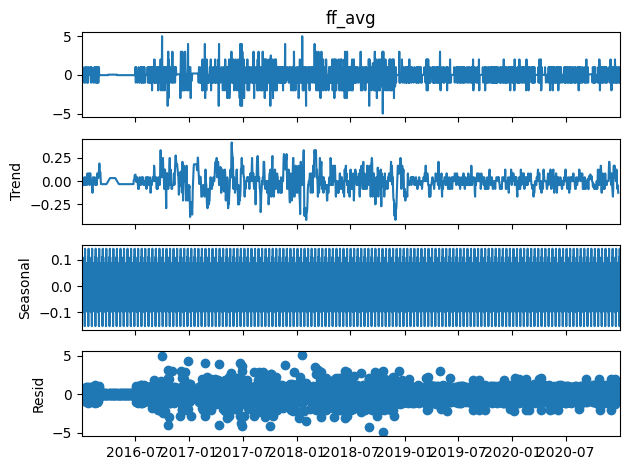

In [81]:
dec = sm.tsa.seasonal_decompose(diff_data_ff ,period = 12,model = 'additive').plot()
plt.show()

In [82]:
stationarity_tester(diff_data_ff)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-16.534532,0.0,-3.433962,-2.863136,-2.567619,True
KPSS,0.050671,0.1,0.739,0.463,0.347,False


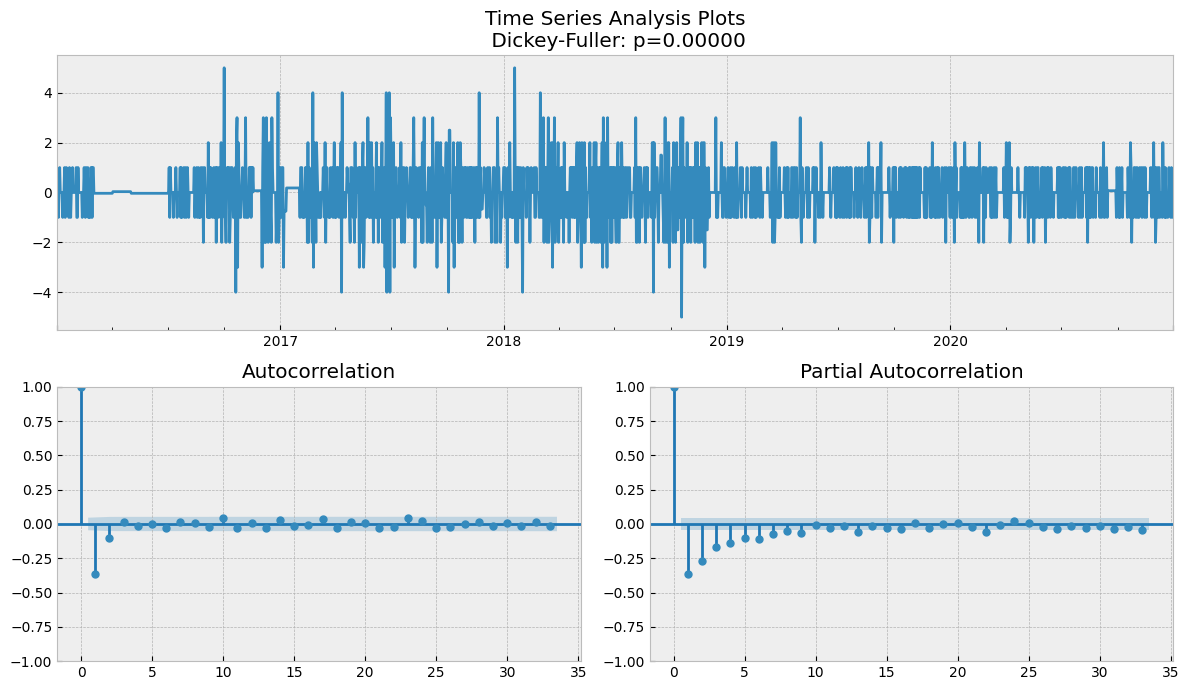

In [83]:
tsplot(diff_data_ff)

parameter (p,d,q) kolom ff = (2,1,1)

In [85]:
diff_data_ddd = stasiun_4_intrp['ddd_x'].diff()
diff_data_ddd.dropna(inplace=True)

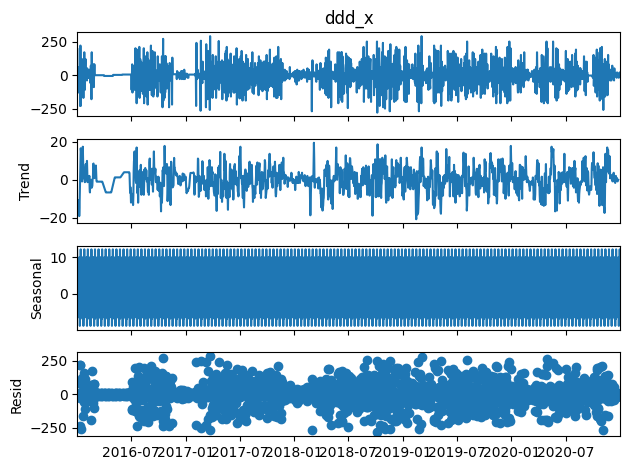

In [87]:
dec = sm.tsa.seasonal_decompose(diff_data_ddd ,period = 12,model = 'additive').plot()
plt.show()

In [90]:
stationarity_tester(stasiun_4_intrp['ddd_x'])

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.035826,0.000019,-3.433958,-2.863134,-2.567618,True
KPSS,0.312818,0.1,0.739,0.463,0.347,False


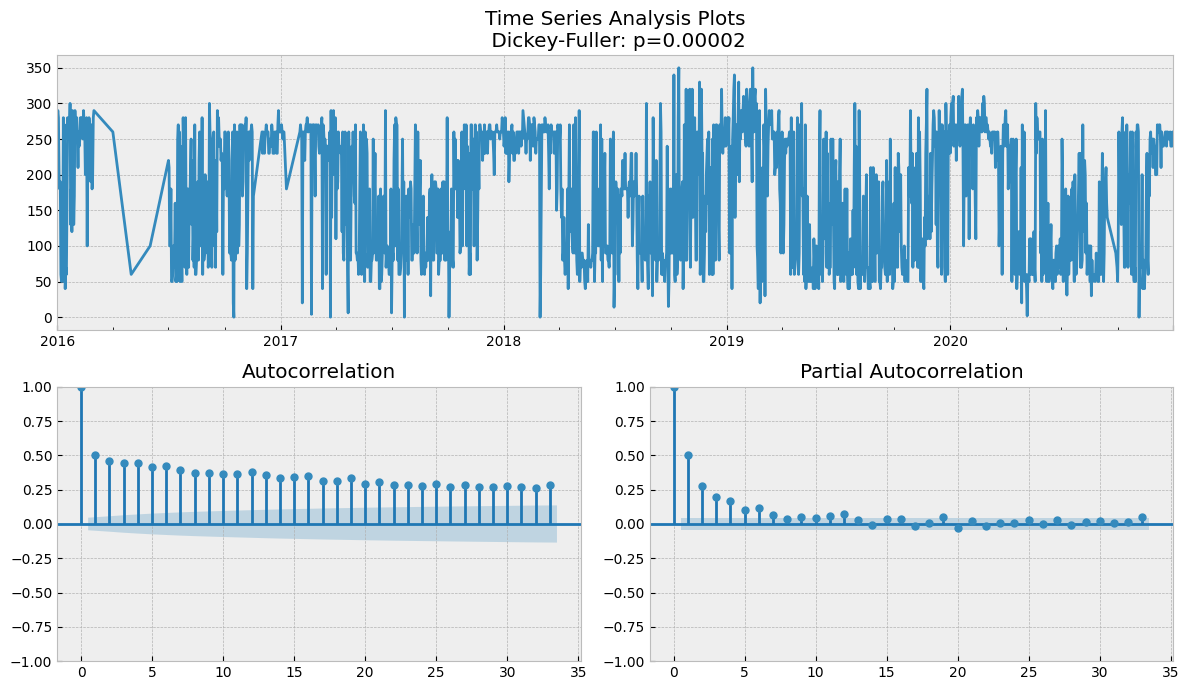

In [91]:
tsplot(stasiun_4_intrp['ddd_x'])

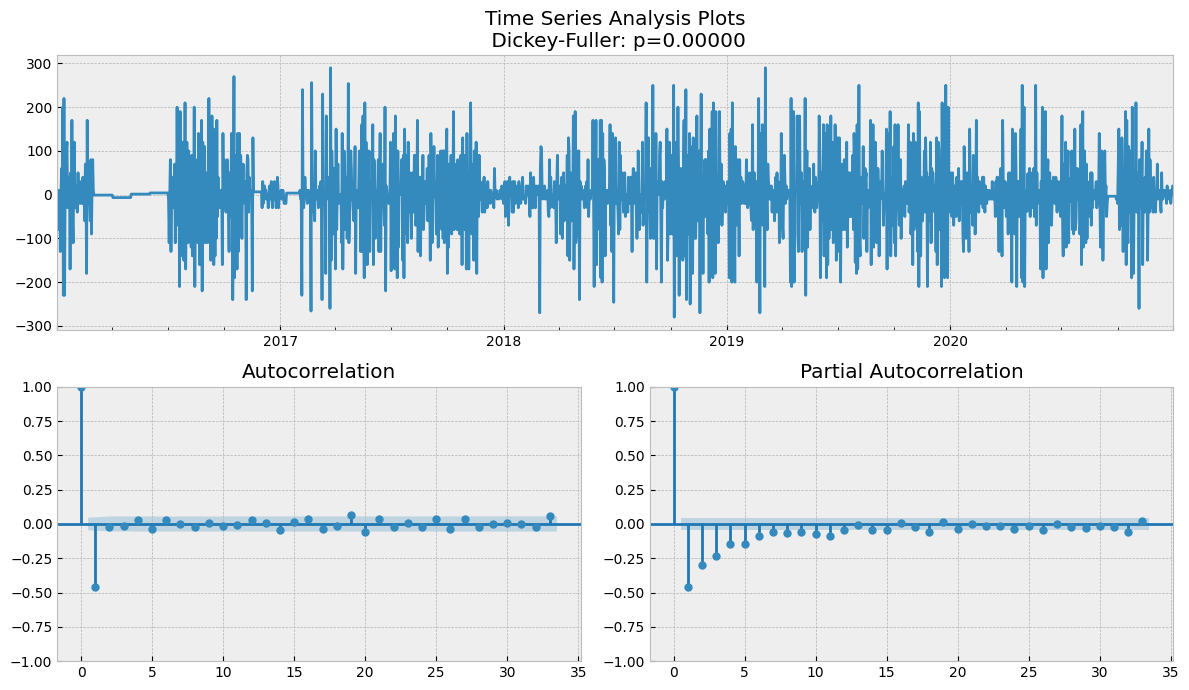

In [92]:
tsplot(diff_data_ddd)

parameter (p,d,q) kolom ddd = (2,1,1)